In [57]:
import matplotlib.pyplot as plt
import numpy as np
import os 

In [58]:
TEST_DIR = "testing/"
TRIES_DIR = "tries/"
GRAPH_DIR = "graphs/"
JSON_FILENAME = "json.txt"
VERSIONS = ["Optimistic", "WaitFree", "FineGrain"]

In [59]:
# Number of testcases to run for each file.
test_cases = 10

# Which test case is being ran. 
number = 1

# Name of the java file to be tested.
JAVA_FILENAME = f"TrieTest{number}"

# Complete name of the java file to be tested, including file path. 
FILEPATH = TEST_DIR + JAVA_FILENAME

In [60]:
# Dictionary of dictionaries that maps the implementation -> number of threads -> runtime
thread_times = {version : {} for version in VERSIONS}
print(thread_times)

{'Optimistic': {}, 'WaitFree': {}, 'FineGrain': {}}


In [61]:
def cleanup():
    for item in os.listdir(TEST_DIR):
        if item.endswith(".class"):
            os.remove(TEST_DIR + item)

    for item in os.listdir(TEST_DIR + "all_tests/"):
        if item.endswith(".class"):
            os.remove(TEST_DIR + "all_tests/" + item)

    for item in os.listdir(TRIES_DIR):
        if item.endswith(".class"):
            os.remove(TRIES_DIR + item)

In [62]:
# Just in case
cleanup()

In [63]:
# Compile the java file.
os.system(f"javac {FILEPATH}.java")

# If the program does not compile successfully there will be no class files. 
os.path.exists(f"{FILEPATH}.class")

True

In [64]:
def runTest():
    run = f"java {FILEPATH}"
    for version in VERSIONS:
        run += f" {version}"

    os.system(run)

In [65]:
def readFile(ifp):
    for line in ifp:
        # Split json key val pairs.
        json_elements = line.split(',')

        # Read first key val pair in json.
        colon = json_elements[0].index(':')
        num_threads = int(json_elements[0][colon+2:])

        # Read second key val pair in json.
        colon = json_elements[1].index(':')
        time = int(json_elements[1][colon+1:])

        # Put time in dictionary.
        if num_threads in thread_times[version]:
            thread_times[version][num_threads] += time
        else:
            thread_times[version][num_threads] = time

In [66]:
for i in range(test_cases):

    runTest()

    for version in VERSIONS:
        # Open the file that the testcase created and read each line. 
        ifp = open(version + JSON_FILENAME)
        readFile(ifp)
        ifp.close()

        os.remove(version + JSON_FILENAME)

In [67]:
cleanup()

In [68]:
# If there is more than one test case we need to get the average runtime.
for version in VERSIONS:
    for key in thread_times[version]:
        thread_times[version][key] = thread_times[version][key] / test_cases

In [69]:
xticks = [x for x in range(0, 36, 5)]

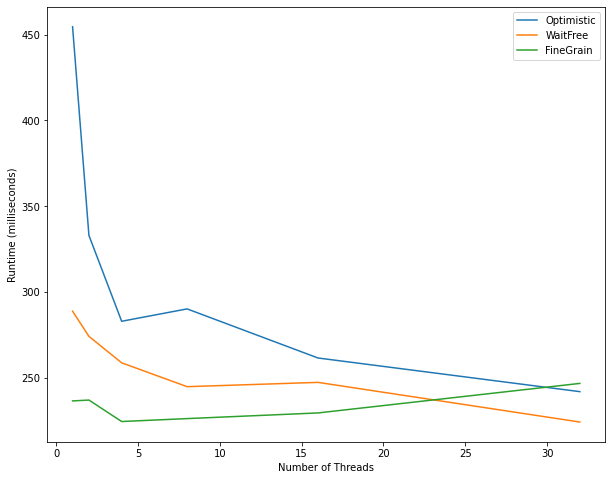

In [70]:
fig = plt.figure(figsize=(10,8))
plt.xticks(xticks)

plt.xlabel("Number of Threads")
plt.ylabel("Runtime (milliseconds)")

x = np.array([key for key in thread_times[VERSIONS[0]]])
for version in VERSIONS:
    y = np.array([thread_times[version][key] for key in thread_times[version]])
    plt.plot(x, y, label=version)

plt.legend()

In [71]:
test_cases = str(test_cases)
if not os.path.exists(GRAPH_DIR):
    os.mkdir(GRAPH_DIR)
if not os.path.exists(GRAPH_DIR + test_cases):
    os.mkdir(GRAPH_DIR + test_cases)

nextfile = len(os.listdir(GRAPH_DIR + test_cases)) + 1
fig.savefig(f"{GRAPH_DIR}{test_cases}/graph{nextfile}.png")